# Thống kê lương theo loại công ty, đưa ra nhận xét.

Để trả lời câu hỏi trên ta sẽ phân loại công ty công nghệ, ngân hàng, thực phẩm,...

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import warnings
import re 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Đọc dữ liệu từ file `data.csv`.

In [2]:
df = pd.read_csv('data.csv')
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


### Thêm cột loại công ty

In [3]:
def Phanloai(df):
    df["Company"] =  df["Company"].str.lower()
    tech = ["công nghệ", "cong nghe", "software", "microtec", "skynet", "phần mềm", "cntt", "tech" ]
    dichvu = ["dich vu", "dịch vụ", "thương mại dịch vụ"]
    thuongmai = ["thuong mai", "thương mại"]
    df["CongNghe"] =  df["Company"].apply(lambda x: 1 if any(i in x for i in tech) else 0)
    df["ThuongMai"] =  df["Company"].apply(lambda x: 1 if any(i in x for i in thuongmai) else 0)
    df["DichVu"] =  df["Company"].apply(lambda x: 1 if any(i in x for i in dichvu) else 0)

In [4]:
temp_df = df.copy()
Phanloai(temp_df)
temp_df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData,CongNghe,ThuongMai,DichVu
0,Business Analyst,asilla việt nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...,0,0,0
1,Android Developer,fpt software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ...",1,0,0
2,Nhân Viên IT,công ty cpxd&ptht tây hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...,0,0,0
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,ngân hàng thương mại cổ phần kiên long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ...",0,1,0
4,Java Developer,công ty tnhh youmed việt nam,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s...",0,0,0


In [5]:
def tuple_min(x):
    x = x.split(", ")
    for i in x:
        i = i.split('(')
        return float(i[1])

def tuple_max(x):
    x = x.split(", ")
    for i in range(len(x)):
        if (i % 2==1):
            x[i] = x[i].split(')')
            return float(x[i][0])

def mean(x):
    max = tuple_max(x)
    min = tuple_min(x)
    return (max+min)/2

def draw_plot(df):
    Company_df = df[["Title","Salary","KinhNghiem"]].dropna()
    Company_df['Salary'] = Company_df['Salary'].apply(mean)
    Company_df = Company_df.groupby(by='Title').mean().sort_values(by='Salary', ascending=False)
    Company_df = Company_df[:20]
    Company_df = Company_df.reset_index()

    sns.barplot(x=Company_df['Salary'], y=Company_df['Title'])
    plt.xlabel('Mức lương')


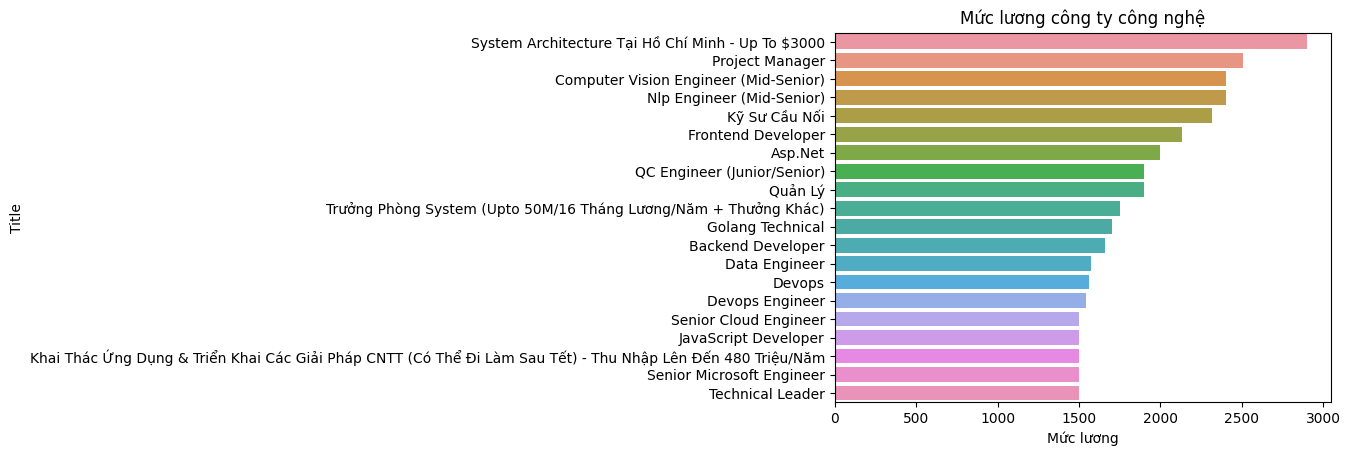

In [6]:
Tech_Company = temp_df[temp_df["CongNghe"] == 1]
draw_plot(Tech_Company)
plt.title('Mức lương công ty công nghệ')
plt.show()

Mức lương các công ty về công nghệ
+ Mức lương cao nhất là 3000$/ tháng.
+ Các title có lương cao nhất là project manager, hoặc senior.

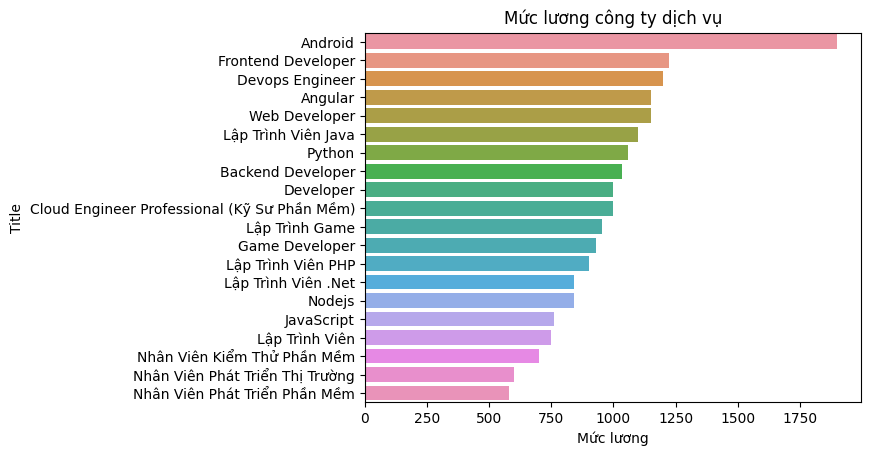

In [7]:
DichVu_Company = temp_df[temp_df["DichVu"] == 1 ][temp_df["CongNghe"] == 0]
draw_plot(DichVu_Company)
plt.title('Mức lương công ty dịch vụ')
plt.show()

Mức lương các công ty về dịch vụ
+ Mức lương cao nhất là 2000$/ tháng.
+ Các title có lương cao nhất là android, frontend,... Chủ yếu là về công nghệ phần mềm. 
+ Có thể thấy xu hướng của các công ty dịch vụ là kết hợp dịch vụ và công nghệ phần mềm.

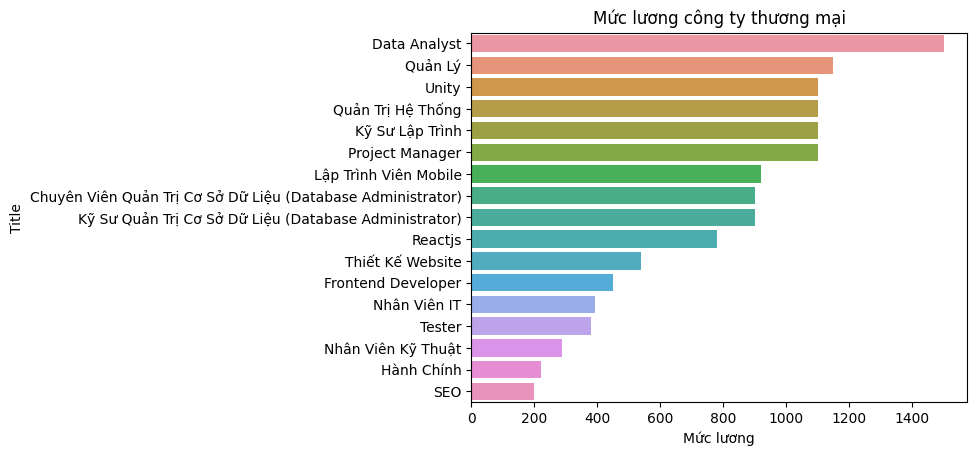

In [8]:
ThuongMai_Company = temp_df[temp_df["ThuongMai"] == 1][temp_df["DichVu"] == 0][temp_df["CongNghe"] == 0]
draw_plot(ThuongMai_Company)
plt.title('Mức lương công ty thương mại')
plt.show()

Mức lương các công ty về thương mại
+ Mức lương cao nhất là khoảng 1600$/tháng.
+ Các title có lương cao nhất là data analyst, quản lý...
+ Có thể thấy công ty thương mại tập trung vào phân tích, xu hướng khách hàng,...

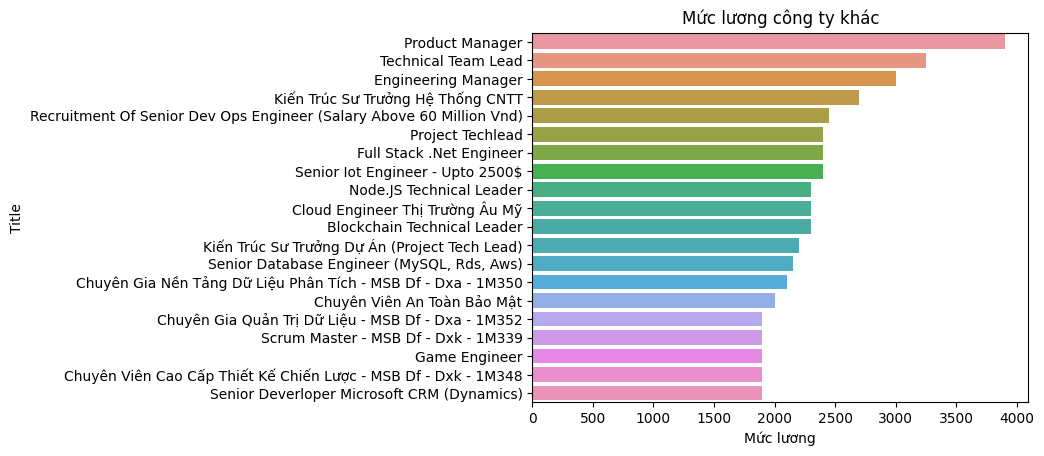

In [9]:
Khac = temp_df[temp_df["ThuongMai"] == 0][temp_df["DichVu"] == 0][temp_df["CongNghe"] == 0]
draw_plot(Khac)
plt.title('Mức lương công ty khác')
plt.show()

Kết luận: 
- Với mỗi công ty về lĩnh vực khác nhau sẽ có nhu cầu về lập trình viên các mảng khác nhau.
- Tuy nhiên, mỗi ngành đều có xu hướng phát triển cùng với công nghệ thông tin trong tương lai.

In [10]:
new_df = df

In [11]:
new_df.dropna(inplace = True)

In [12]:
new_df

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
6,Tester,Công ty TNHH City Ascom Việt Nam,2023-03-31,"(600, 800)",5,Toàn thời gian,Nhân viên,Không yêu cầu,0.5,"Hà Nội,Đống Đa","test cases,QC/QA,Automation Test,JLPT N3",Nghiên cứu yêu cầu và thiết kế của sản phẩm / ...
8,System Engineer,Công ty Cổ phần Viễn thông - Tin học Bưu điện,2022-12-22,"(1600, 1800)",2,Toàn thời gian,Nhân viên,Nam,1.0,"Hà Nội,Cầu Giấy","System Admin,MCSA,VMWare","Tham gia triển khai các dự án CNTT: khảo sát, ..."
9,Lập Trình Viên,Công ty Dịch vụ MobiFone Khu vực 6 – CN Tổng C...,2022-12-28,"(400, 500)",3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Nghệ An,TP Vinh","AngularJS,HTML,Javascript,ReactJS"," Tham gia phát triển các dự án về Web, xây dự..."
11,Lập Trình Viên,Công ty Dịch vụ MobiFone Khu vực 6 – CN Tổng C...,2022-12-28,"(400, 500)",2,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Nghệ An,TP Vinh","HTML5,Java,SQL", Xây dựng các giải pháp về kiến trúc (archite...
...,...,...,...,...,...,...,...,...,...,...,...,...
2327,Backend Developer,CÔNG TY CỔ PHẦN CÔNG NGHỆ FINVIET,2023-01-18,"(1200, 1400)",3,Toàn thời gian,Nhân viên,Không yêu cầu,2.0,Hồ Chí Minh,"Javascript,NodeJS","• Design, develop, improve, and maintain core ..."
2329,Senior Developer,CÔNG TY TNHH CTRL MEDIA,2023-01-31,"(1000, 1200)",2,Toàn thời gian,Trưởng nhóm,Không yêu cầu,1.0,"Hồ Chí Minh,Bình Thạnh","Laravel,MySQL,OOP",Tham gia phát triển các dự án website dùng Lar...
2331,Reactjs,POWERGATE AUSTRALIA (CÔNG TY CỔ PHẦN TẬP ĐOÀ...,2023-01-31,"(1300, 1500)",1,Toàn thời gian,Nhân viên,Không yêu cầu,2.0,"Hà Nội,Cầu Giấy","Javascript,ReactJS","Với vai trò là một ReactNative/ReactJS, bạn sẽ..."
2333,Java,Công ty TNHH đầu tư công nghệ và dịch vụ Sconn...,2023-01-20,"(400.0, 800.0)",3,Toàn thời gian,Nhân viên,Không yêu cầu,0.5,"Hà Nội,Thanh Xuân","MySQL,Oracle,SQL Server,CSS3,Spring",+ Nhân viên- Chuyên viên-Chuyên viên cao cấp...


In [13]:
def avg_Salary(salary):
    salary = salary.replace("(",'').replace(")",'').replace(" ",'')
    salary = salary.split(',')
    a = (float(salary[0])+float(salary[1]))/2
    return (float(salary[0])+float(salary[1]))/2

In [14]:
new_df["Salary"] = new_df["Salary"].apply(avg_Salary)
new_df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,900.0,1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
6,Tester,Công ty TNHH City Ascom Việt Nam,2023-03-31,700.0,5,Toàn thời gian,Nhân viên,Không yêu cầu,0.5,"Hà Nội,Đống Đa","test cases,QC/QA,Automation Test,JLPT N3",Nghiên cứu yêu cầu và thiết kế của sản phẩm / ...
8,System Engineer,Công ty Cổ phần Viễn thông - Tin học Bưu điện,2022-12-22,1700.0,2,Toàn thời gian,Nhân viên,Nam,1.0,"Hà Nội,Cầu Giấy","System Admin,MCSA,VMWare","Tham gia triển khai các dự án CNTT: khảo sát, ..."
9,Lập Trình Viên,Công ty Dịch vụ MobiFone Khu vực 6 – CN Tổng C...,2022-12-28,450.0,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Nghệ An,TP Vinh","AngularJS,HTML,Javascript,ReactJS"," Tham gia phát triển các dự án về Web, xây dự..."
11,Lập Trình Viên,Công ty Dịch vụ MobiFone Khu vực 6 – CN Tổng C...,2022-12-28,450.0,2,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Nghệ An,TP Vinh","HTML5,Java,SQL", Xây dựng các giải pháp về kiến trúc (archite...


In [15]:
def TypeCopany(Company):
    Company =  Company.lower()
    tech = ["công nghệ", "cong nghe", "software", "microtec", "skynet", "phần mềm", "cntt", "tech" ]
    dichvu = ["dich vu", "dịch vụ", "thương mại dịch vụ"]
    thuongmai = ["thuong mai", "thương mại"]
    for i in tech:
        if i in Company:
            return "Công nghệ"
    for i in dichvu:
        if i in Company:
            return "Dịch vụ"
    for i in thuongmai:
        if i in Company:
            return "Thương mại"
    return "Khác"

In [16]:
new_df["Type_Company"] = new_df["Company"].apply(TypeCopany)

ValueError: could not convert string to float: 'NgânHàngThươngMạiCổPhầnKiênLong'